# 台灣銀行牌告匯率爬蟲練習
## 範例1： 練習爬取台幣對其他貨幣匯率資料

In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

### 進入台灣銀行牌告匯率網頁：https://rate.bot.com.tw/xrt?Lang=zh-TW ，擷取當日台幣對美金的匯率資訊

In [2]:
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 查詢美金(也就是匯率表的第一個元素)對台幣的匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 去掉空白

buy_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金買入'})
sell_rate = rate_table[0].find(name='td', attrs={'data-table':'本行現金賣出'})
print("即時現金買入: %s, 即時現金賣出: %s" % (buy_rate.get_text(), sell_rate.get_text()))


美金(USD)

即時現金買入: 29.095, 即時現金賣出: 29.765


### 作業part 1：請參考上面的範例，試著爬取所有貨幣對台幣的匯率

In [3]:
# luke
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print(html.find('table').find_all('div', class_='hidden-phone print_show'))
result = html.find('tbody').find_all('tr')
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
for item in result:
    curreny = item.find(class_='hidden-phone print_show').text
    in_curreny = item.find('td', attrs={'data-table':'本行現金買入'}).text
    out_curreny = item.find('td', attrs={'data-table':'本行現金賣出'}).text
    print("幣別 : {0} , 本行現金買入 : {1} , 本行現金賣出 : {2}".format(curreny.strip(),in_curreny.strip(),out_curreny.strip()))
    

幣別 : 美金 (USD) , 本行現金買入 : 29.095 , 本行現金賣出 : 29.765
幣別 : 港幣 (HKD) , 本行現金買入 : 3.649 , 本行現金賣出 : 3.853
幣別 : 英鎊 (GBP) , 本行現金買入 : 37.11 , 本行現金賣出 : 39.23
幣別 : 澳幣 (AUD) , 本行現金買入 : 20.7 , 本行現金賣出 : 21.48
幣別 : 加拿大幣 (CAD) , 本行現金買入 : 21.52 , 本行現金賣出 : 22.43
幣別 : 新加坡幣 (SGD) , 本行現金買入 : 20.86 , 本行現金賣出 : 21.77
幣別 : 瑞士法郎 (CHF) , 本行現金買入 : 31.45 , 本行現金賣出 : 32.65
幣別 : 日圓 (JPY) , 本行現金買入 : 0.2715 , 本行現金賣出 : 0.2843
幣別 : 南非幣 (ZAR) , 本行現金買入 : - , 本行現金賣出 : -
幣別 : 瑞典幣 (SEK) , 本行現金買入 : 2.98 , 本行現金賣出 : 3.5
幣別 : 紐元 (NZD) , 本行現金買入 : 19.1 , 本行現金賣出 : 19.95
幣別 : 泰幣 (THB) , 本行現金買入 : 0.8119 , 本行現金賣出 : 1.0019
幣別 : 菲國比索 (PHP) , 本行現金買入 : 0.5268 , 本行現金賣出 : 0.6598
幣別 : 印尼幣 (IDR) , 本行現金買入 : 0.00168 , 本行現金賣出 : 0.00238
幣別 : 歐元 (EUR) , 本行現金買入 : 33.87 , 本行現金賣出 : 35.21
幣別 : 韓元 (KRW) , 本行現金買入 : 0.02296 , 本行現金賣出 : 0.02686
幣別 : 越南盾 (VND) , 本行現金買入 : 0.0009 , 本行現金賣出 : 0.0014
幣別 : 馬來幣 (MYR) , 本行現金買入 : 5.837 , 本行現金賣出 : 7.462
幣別 : 人民幣 (CNY) , 本行現金買入 : 4.113 , 本行現金賣出 : 4.275


## 範例2：爬取一個月的美金對台幣歷史匯率資料，並畫出趨勢圖


美金(USD)



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 720x576 with 0 Axes>

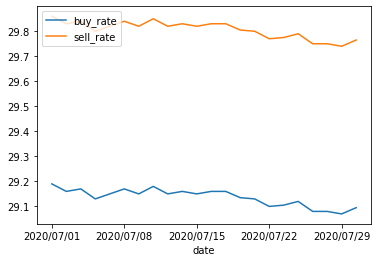

In [6]:
# 先到牌告匯率首頁，爬取所有貨幣的種類
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')

# 擷取匯率表格，把美金(也就是匯率表的第一個元素)擷取出來，查詢其歷史匯率
currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
print(currency.get_text().replace(" ", ""))  # 貨幣種類

# 針對美金，找到其「歷史匯率」的首頁 
history_link = rate_table[0].find(name='td', attrs={'data-table':'歷史匯率'})
history_rate_link = "https://rate.bot.com.tw" + history_link.a["href"]  # 該貨幣的歷史資料首頁

#
# 到貨幣歷史匯率網頁，選則該貨幣的「歷史區間」，送出查詢後，觀察其網址變化情形，再試著抓取其歷史匯率資料
#
# 用「quote/年-月」去取代網址內容，就可以連到該貨幣的歷史資料
quote_history_url = history_rate_link.replace("history", "quote/2020-07")
resp = requests.get(quote_history_url)
resp.encoding = 'utf-8'
history = BeautifulSoup(resp.text, "lxml")
history_table = history.find(name='table', attrs={'title':'歷史本行營業時間牌告匯率'}).find(name='tbody').find_all(name='tr')

#
# 擷取到歷史匯率資料後，把資料彙整起來並畫出趨勢圖
#
date_history = list()
history_buy = list()
history_sell = list()

for history_rate in history_table:
    # 擷取日期資料
    date_string = history_rate.a.get_text()
    date = datetime.strptime(date_string, '%Y/%M/%d').strftime('%Y/%M/%d')  # 轉換日期格式
    date_history.append(date)  # 日期歷史資料

    history_ex_rate = history_rate.find_all(name='td', attrs={'class':'rate-content-cash text-right print_table-cell'})
    history_buy.append(float(history_ex_rate[0].get_text()))  # 歷史買入匯率
    history_sell.append(float(history_ex_rate[1].get_text()))  # 歷史賣出匯率

# 將匯率資料建成dataframe形式
HistoryExchangeRate = pd.DataFrame({'date': date_history,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

# 畫出歷史匯率軌跡圖
plt.figure(figsize=(10, 8))
HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
plt.legend(loc="upper left")
plt.show()

### 作業part 2：爬取每種貨幣對台幣的一個月歷史匯率資料，並畫出趨勢圖


美金(USD)



<Figure size 720x576 with 0 Axes>

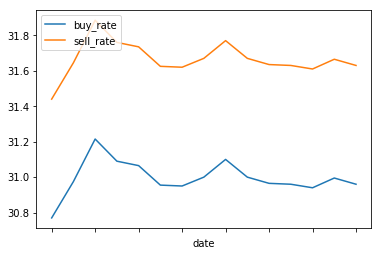


港幣(HKD)



<Figure size 720x576 with 0 Axes>

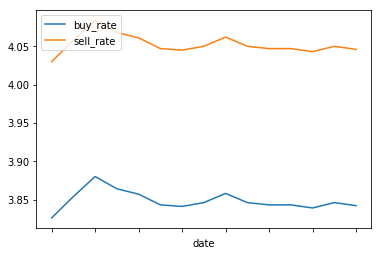


英鎊(GBP)



<Figure size 720x576 with 0 Axes>

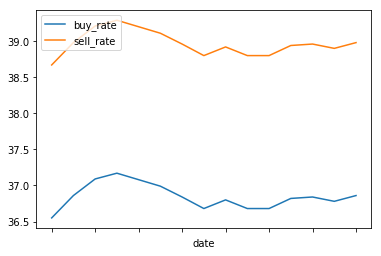


澳幣(AUD)



<Figure size 720x576 with 0 Axes>

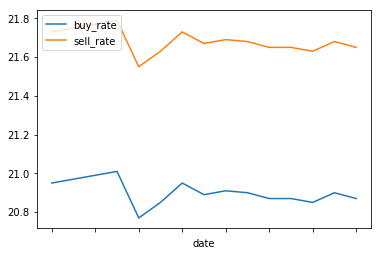


加拿大幣(CAD)



<Figure size 720x576 with 0 Axes>

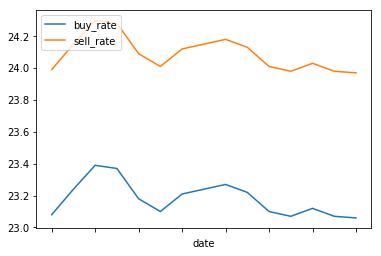


新加坡幣(SGD)



<Figure size 720x576 with 0 Axes>

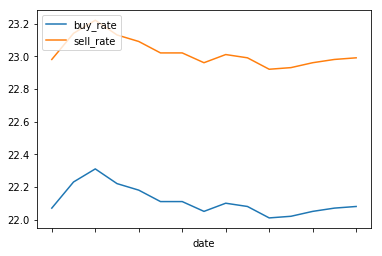


瑞士法郎(CHF)



<Figure size 720x576 with 0 Axes>

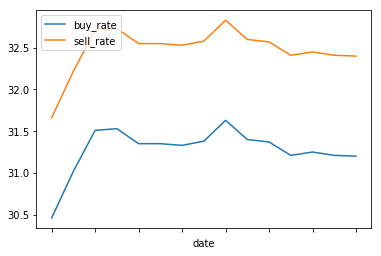


日圓(JPY)



<Figure size 720x576 with 0 Axes>

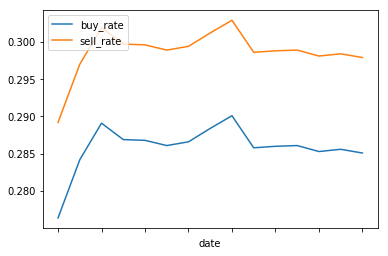


南非幣(ZAR)



<Figure size 720x576 with 0 Axes>

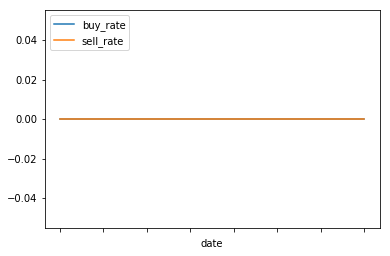


瑞典幣(SEK)



<Figure size 720x576 with 0 Axes>

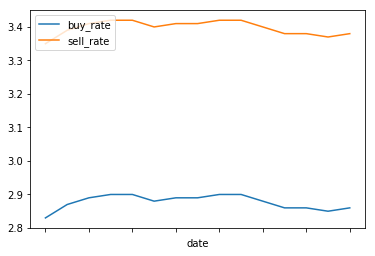


紐元(NZD)



<Figure size 720x576 with 0 Axes>

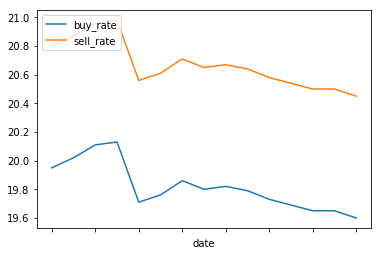


泰幣(THB)



<Figure size 720x576 with 0 Axes>

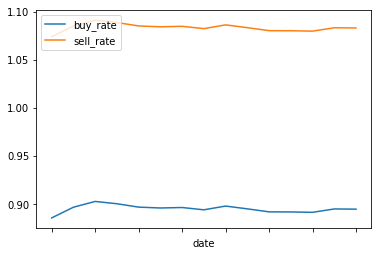


菲國比索(PHP)



<Figure size 720x576 with 0 Axes>

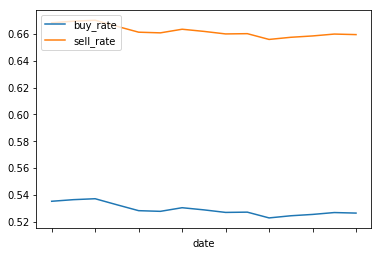


印尼幣(IDR)



<Figure size 720x576 with 0 Axes>

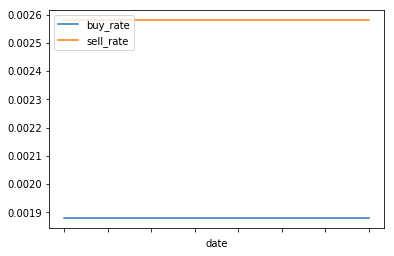


歐元(EUR)



<Figure size 720x576 with 0 Axes>

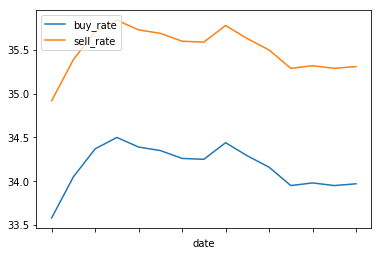


韓元(KRW)



<Figure size 720x576 with 0 Axes>

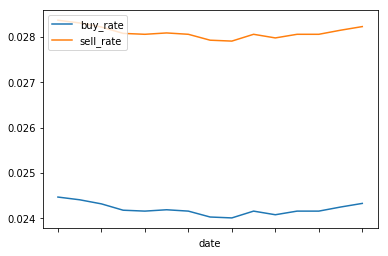


越南盾(VND)



<Figure size 720x576 with 0 Axes>

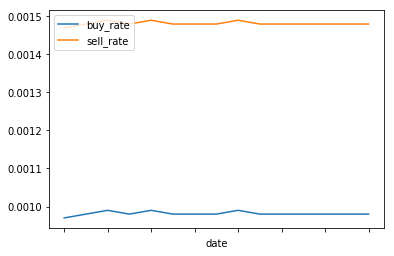


馬來幣(MYR)



<Figure size 720x576 with 0 Axes>

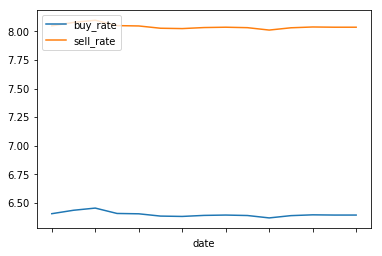


人民幣(CNY)



<Figure size 720x576 with 0 Axes>

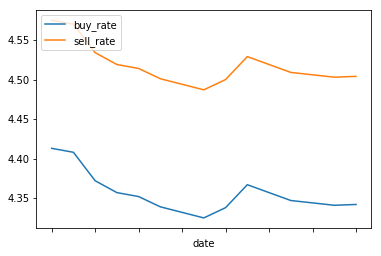

In [5]:
'''

  Your code here

'''


                                美金 (USD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

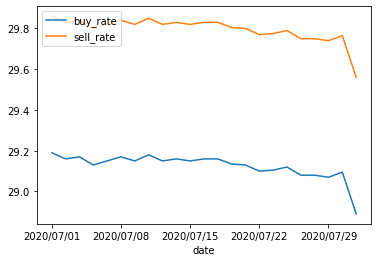


                                港幣 (HKD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

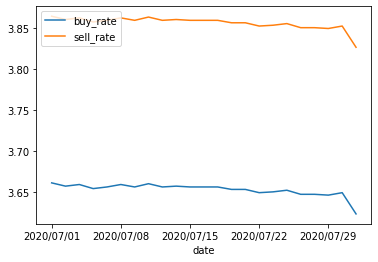


                                英鎊 (GBP)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

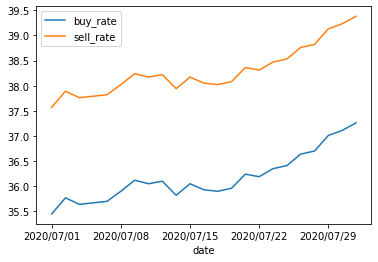


                                澳幣 (AUD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

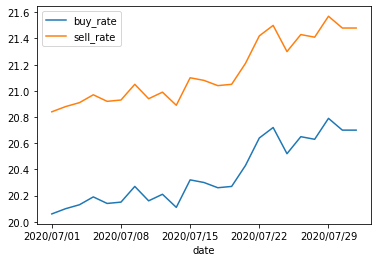


                                加拿大幣 (CAD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

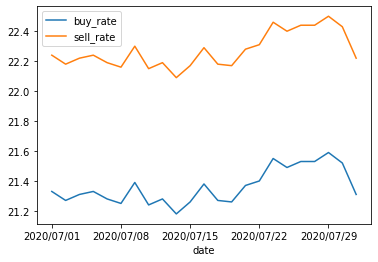


                                新加坡幣 (SGD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

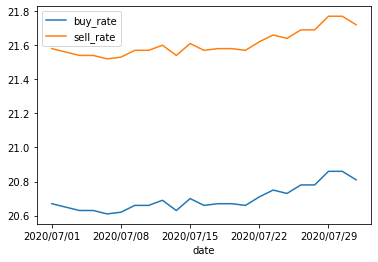


                                瑞士法郎 (CHF)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

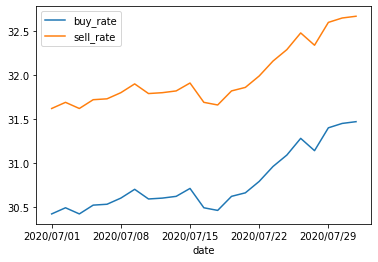


                                日圓 (JPY)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

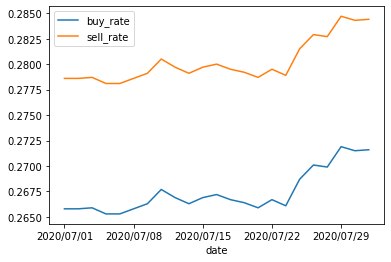


                                南非幣 (ZAR)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

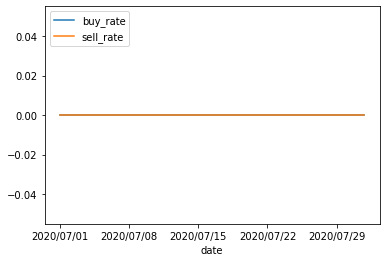


                                瑞典幣 (SEK)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

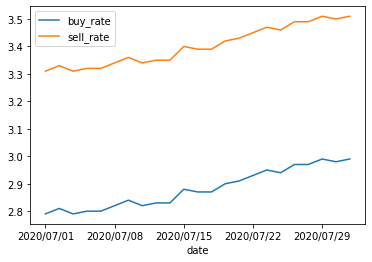


                                紐元 (NZD)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

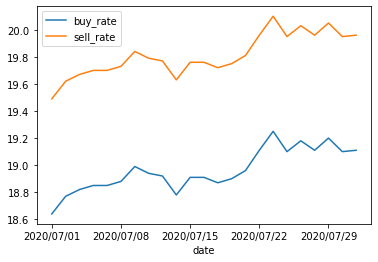


                                泰幣 (THB)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

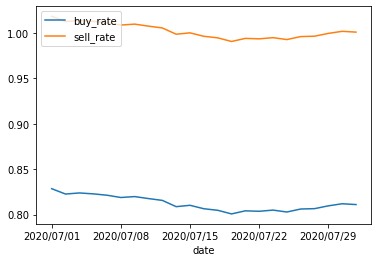


                                菲國比索 (PHP)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

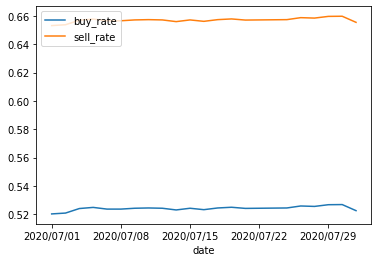


                                印尼幣 (IDR)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

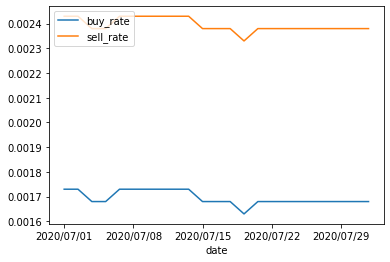


                                歐元 (EUR)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

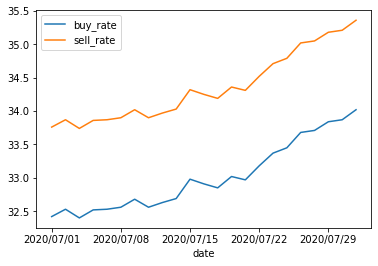


                                韓元 (KRW)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

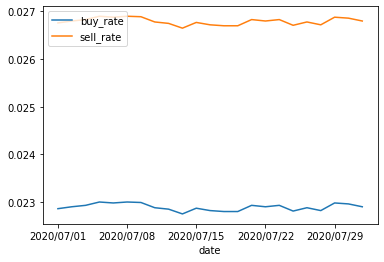


                                越南盾 (VND)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

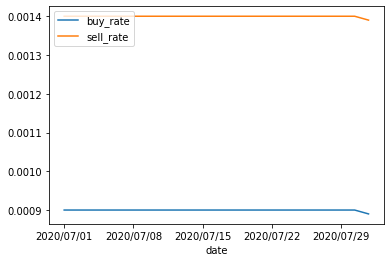


                                馬來幣 (MYR)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

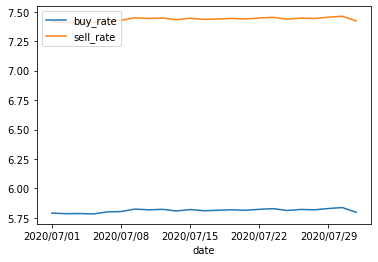


                                人民幣 (CNY)
                            


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 1656x216 with 0 Axes>

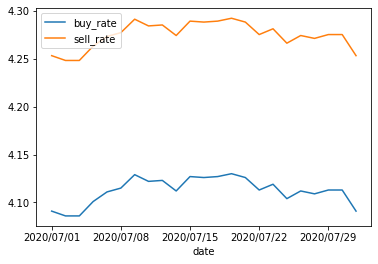

In [66]:
# luke
# 進入台灣銀行牌告匯率網頁，查看當日匯率資料
url = "https://rate.bot.com.tw/xrt?Lang=zh-TW"
resp = requests.get(url)
resp.encoding = 'utf-8'
# print(resp.text)  # 如有需要，列印出網頁原始碼

html = BeautifulSoup(resp.text, "lxml")
rate_table = html.find(name='table', attrs={'title':'牌告匯率'}).find(name='tbody').find_all(name='tr')
#print(html.find('table').find_all('div', class_='hidden-phone print_show'))
result = html.find('tbody').find_all('tr')
#currency = rate_table[0].find(name='div', attrs={'class':'visible-phone print_hide'})
#print(result)
for item in result:
    curreny = item.find(class_='hidden-phone print_show').text
    print(curreny)
    in_curreny = item.find('td', attrs={'data-table':'本行現金買入'}).text
    out_curreny = item.find('td', attrs={'data-table':'本行現金賣出'}).text
    history_ref = item.find('td', attrs={'data-table':'歷史匯率'})
    #print(history_ref.a.get('href'))
    #print("幣別 : {0} , 本行現金買入 : {1} , 本行現金賣出 : {2}".format(curreny.strip(),in_curreny.strip(),out_curreny.strip()))
    history_link = history_ref.find('a').get('href')
    quote = '/quote/2020-07/'
    history_url = 'https://rate.bot.com.tw'+history_link
    last_moth_url = history_url.replace('/history/',quote)
    last_moth_result = requests.get(last_moth_url)
    last_moth_result.encodeing = 'utf-8'
    html = BeautifulSoup(last_moth_result.text, "lxml")
    result = html.find(class_='table', attrs={'title':'歷史本行營業時間牌告匯率'})
    #print(result)
    data_list = list()
    history_buy = list()
    history_sell = list()
    result = result.find(name='tbody').find_all('tr')
    for item in result:
        #print(item.a.get_text())
        data_list.append(item.a.get_text())
       # print(item.find_all('td', attrs={'class':'rate-content-cash'}))
        result = item.find_all('td', attrs={'class':'rate-content-cash'})
        history_buy.append(float(result[0].get_text()))
        history_sell.append(float(result[1].get_text()))

#print(data_list)  
#print(history_buy)
#print(history_sell)

    HistoryExchangeRate = pd.DataFrame({'date': data_list,
                                    'buy_rate':history_buy,
                                    'sell_rate':history_sell})

    HistoryExchangeRate = HistoryExchangeRate.set_index('date')  # 指定日期欄位為datafram的index
    HistoryExchangeRate = HistoryExchangeRate.sort_index(ascending=True)

    # 畫出歷史匯率軌跡圖
    plt.figure(figsize=(23, 3))
    HistoryExchangeRate[['buy_rate','sell_rate']].plot()  # x=['date'], y=[['buy_rate','sell_rate']] 
    plt.legend(loc="upper left")
    plt.show()         
                 